In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [2]:
# dowload dataset
fake = pd.read_csv('ISOT Dataset/Fake.csv')
true = pd.read_csv("ISOT Dataset/True.csv")


In [3]:
# Add flag to track fake and real
fake['target'] = 1
true['target'] = 0

In [4]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [5]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [6]:
data.head()

title  \
0  Republican ex-Treasury chief Paulson slams Tru...   
1  SHOCK POLL In MUST WIN State Of FLORIDA: Hispa...   
2  MEDALS OF VALOR: President Trump Honored Agent...   
3   Newsweek Just Made Their BEST Cover Ever And ...   
4  Trump says he believes Cuba responsible for at...   

                                                text       subject  \
0  WASHINGTON (Reuters) - Henry Paulson, a Republ...  politicsNews   
1  Apparently the Black Lives Matter terror group...     left-news   
2  It s great to have a president who appreciates...      politics   
3  Newsweek has never been a publication to shy a...          News   
4  WASHINGTON (Reuters) - President Donald Trump ...  politicsNews   

                date  target  
0     June 25, 2016        0  
1       Jul 11, 2016       1  
2       Jul 27, 2017       1  
3   November 9, 2017       1  
4  October 16, 2017        0

In [7]:
## Data Preparation
data = data[data['text'].notna()]
data = data[data['title'].notna()]
data = data[data['subject'].notna()]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/administrator/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/administrator/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Let's do some statistics of the text columns
txt_len = data.text.str.split().str.len()
txt_len.describe()

count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: text, dtype: float64

In [10]:
# Let's do some statistics of the title columns
title_len = data.title.str.split().str.len()
title_len.describe()

count    44898.000000
mean        12.453472
std          4.111476
min          1.000000
25%         10.000000
50%         11.000000
75%         14.000000
max         42.000000
Name: title, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

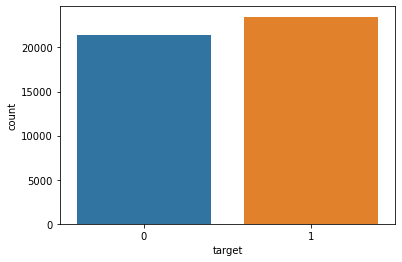

In [11]:
# Class Distribution
# 1: Unreliable
# 2: Reliable
sns.countplot(x='target', data= data)

In [12]:
print(data.target.value_counts())
print()
print(round(data.target.value_counts(normalize=True),2)*100)

1    23481
0    21417
Name: target, dtype: int64

1    52.0
0    48.0
Name: target, dtype: float64


In [13]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [14]:
column_n = ['date', 'title', 'subject', 'text', 'target']
remove_c = ['subject','date']
categorical_features = []
target_col = ['target']
text_f = ['title', 'text']

In [15]:
# cleaning
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# remove unused columns
def remove_unused_c(df, column_n=remove_c):
    df = df.drop(column_n, axis=1)
    return df

# impute null values with none
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(),col] = "None"
    return feature_df

# clean_data
def clean_dataset(df):
    # remove unused column
    df = remove_unused_c(df)    
    #impute null value
    df = null_process(df)
    
    return df

# Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [16]:
df = clean_dataset(data)
df['text'] = df.text.apply(nltk_preprocess)
df['title'] = df.title.apply(nltk_preprocess)

In [17]:
df.head()

title  \
0  republican extreasury chief paulson slam trump...   
1  shock poll must win state florida hispanic tur...   
2  medal valor president trump honored agent offi...   
3      newsweek made best cover ever people freaking   
4  trump say belief cuba responsible attack hurt ...   

                                                text  target  
0  washington reuters henry paulson republican u ...       0  
1  apparently black life matter terror group mana...       1  
2  great president appreciates special agent poli...       1  
3  newsweek never publication shy away controvers...       1  
4  washington reuters president donald trump said...       0

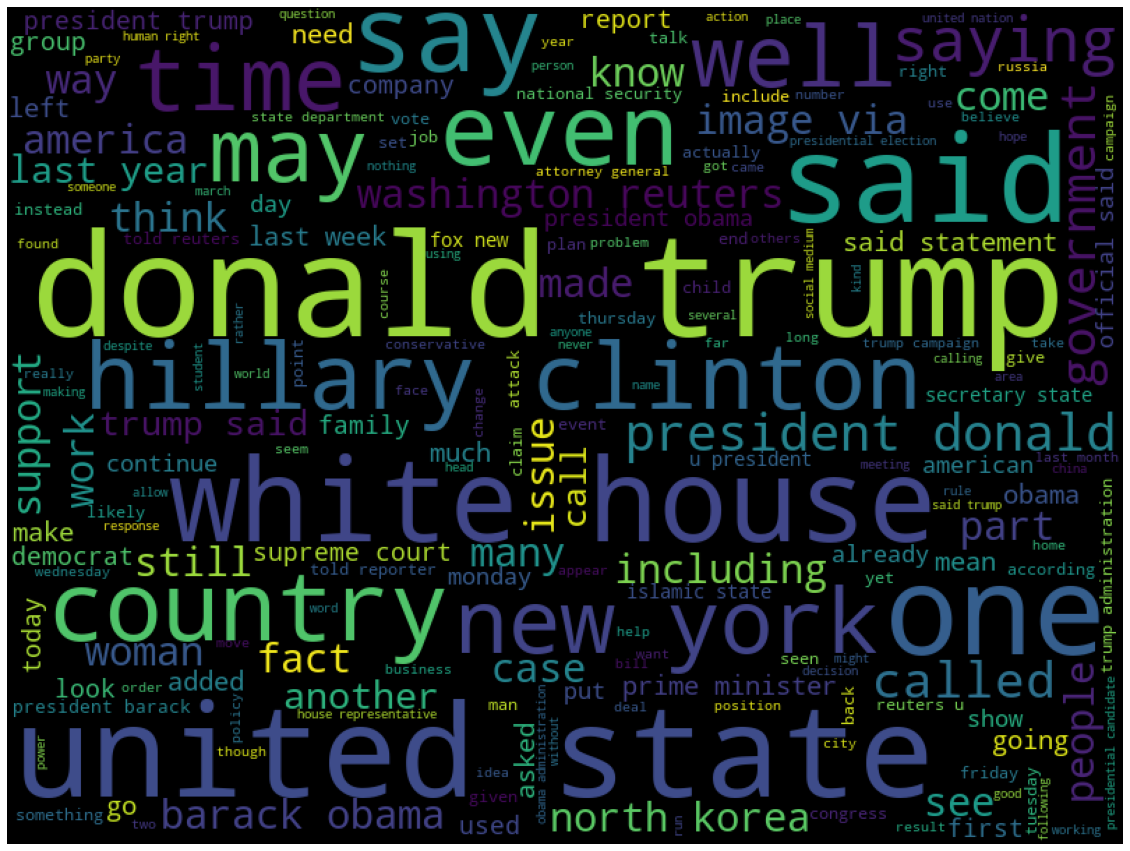

In [18]:
from wordcloud import WordCloud, STOPWORDS

# initialize the word cloud
wordcloud = WordCloud(background_color='black', width=800, height=600)
# generate the word cloud
text_cloud = wordcloud.generate(" ".join(df['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

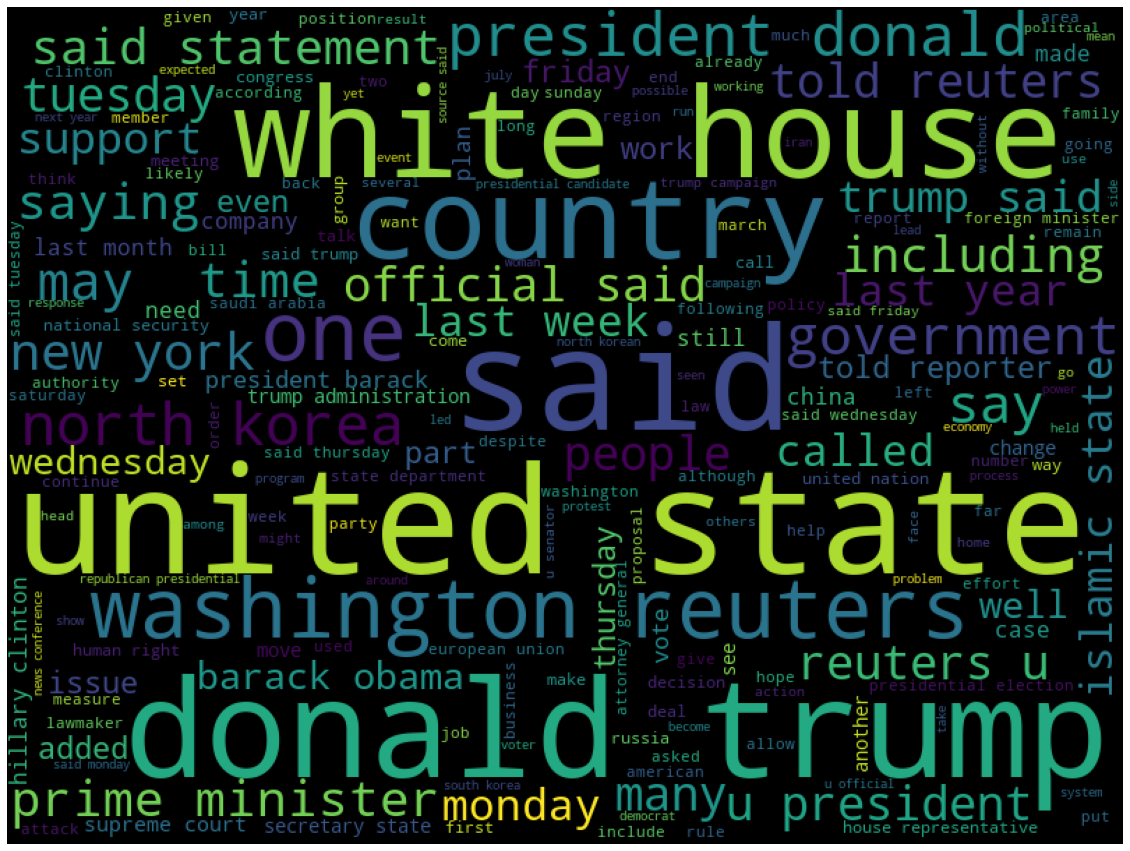

In [19]:
# reliable news (0)
reliable_news = " ".join(df[df['target']==0]['text'])
wc = wordcloud.generate(reliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

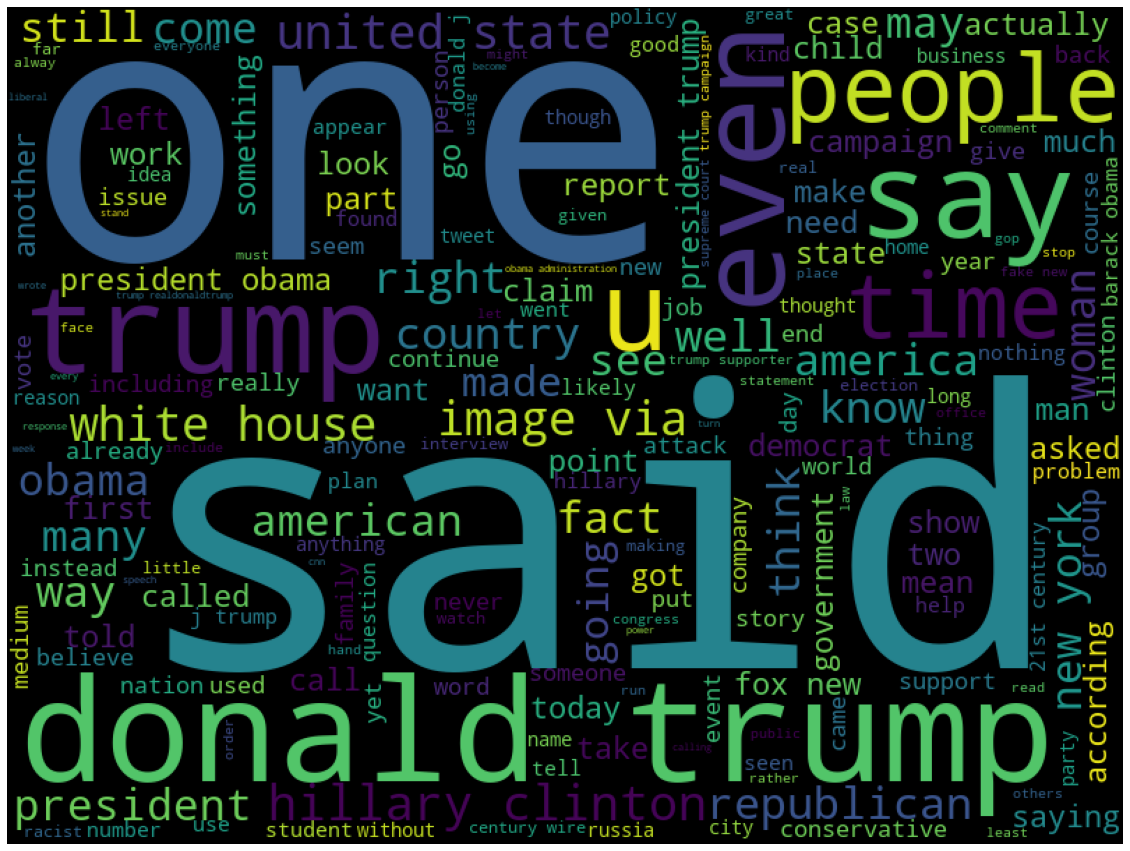

In [20]:
# unreliable news (1)
unreliable_news  = ' '.join(df[df['target']==1]['text'])
wc= wordcloud.generate(unreliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

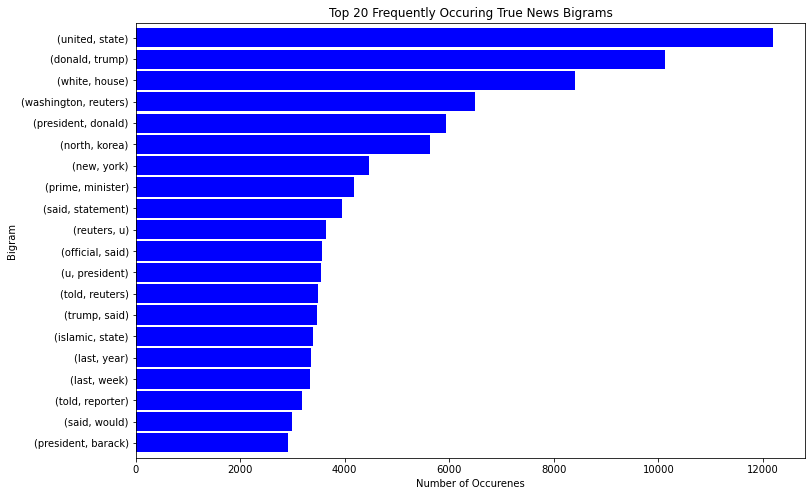

In [21]:
# Bigram 

def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurenes", n =2):
    true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
    true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
    
plot_top_ngrams(reliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=2)

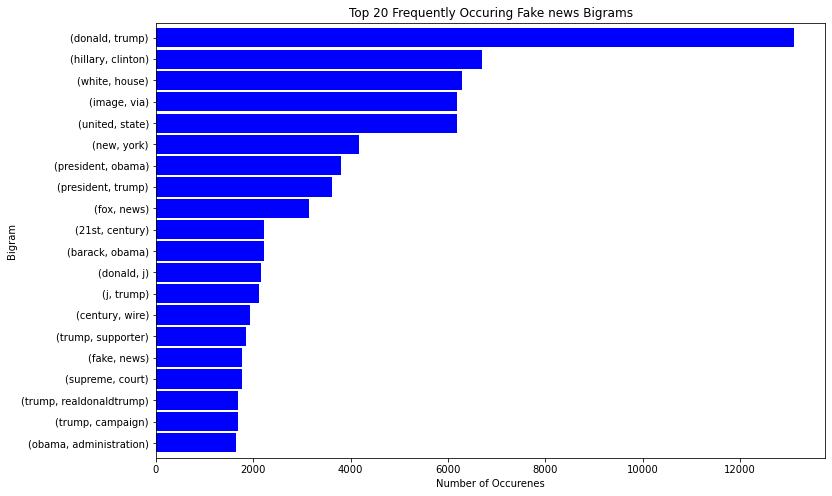

In [22]:
plot_top_ngrams(unreliable_news, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

In [23]:
# Trigram
plot_top_ngrams(reliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=3)

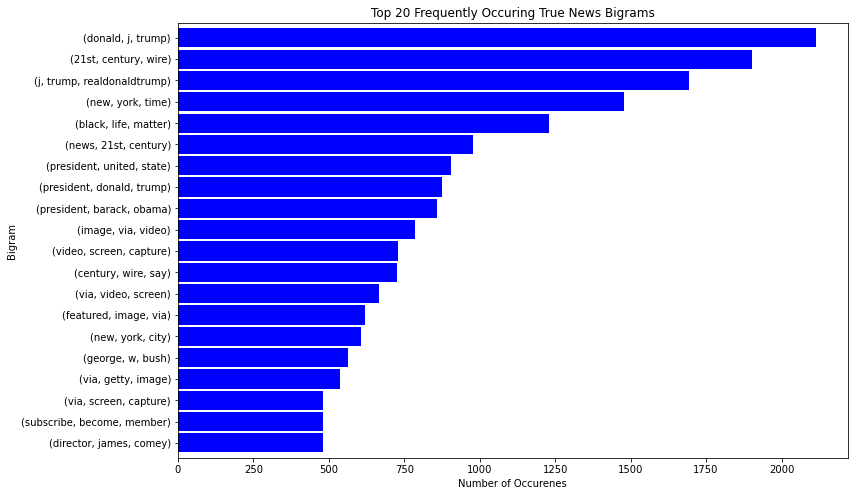

In [24]:
plot_top_ngrams(unreliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=3)

In [25]:
!pip install transformers

In [26]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import random

In [27]:
import tensorflow as tf
with tf.device('GPU:1'):
    def set_seed(seed: int):
        """
        Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
        installed).

        Args:
            seed (:obj:`int`): The seed to set.
        """
        random.seed(seed)
        np.random.seed(seed)
        if is_torch_available():
            torch.manual_seed(seed)
            torch.cuda.manual_seed_all(seed)
            # ^^ safe to call this function even if cuda is not available
        if is_tf_available():
            import tensorflow as tf

            tf.random.set_seed(seed)

    set_seed(123)

2022-05-16 14:38:42.403950: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-16 14:38:43.367928: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14637 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0
2022-05-16 14:38:43.368594: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14637 MB memory:  -> device: 1, name: Tesla V100-PCIE-16GB, pci bus id: 0000:d8:00.0, compute capability: 7.0


In [28]:
with tf.device('GPU:1'):
    model_name = "bert-base-uncased"
    max_length= 512

In [29]:
with tf.device('GPU:1'):
    tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

In [30]:
data.head()

title  \
0  Republican ex-Treasury chief Paulson slams Tru...   
1  SHOCK POLL In MUST WIN State Of FLORIDA: Hispa...   
2  MEDALS OF VALOR: President Trump Honored Agent...   
3   Newsweek Just Made Their BEST Cover Ever And ...   
4  Trump says he believes Cuba responsible for at...   

                                                text       subject  \
0  WASHINGTON (Reuters) - Henry Paulson, a Republ...  politicsNews   
1  Apparently the Black Lives Matter terror group...     left-news   
2  It s great to have a president who appreciates...      politics   
3  Newsweek has never been a publication to shy a...          News   
4  WASHINGTON (Reuters) - President Donald Trump ...  politicsNews   

                date  target  
0     June 25, 2016        0  
1       Jul 11, 2016       1  
2       Jul 27, 2017       1  
3   November 9, 2017       1  
4  October 16, 2017        0

In [31]:
with tf.device('GPU:1'):
    ## Data Preparation
    data = data[data['text'].notna()]


In [33]:
with tf.device('GPU:1'):
    def prepare_data(df, test_size=0.2, include_title=True, include_author=True):
        texts = []
        labels = []

        for i in range(len(df)):
            text = df['text'].iloc[i]
            label = df['target'].iloc[i]

            if text and label in [0,1]:
                texts.append(text)
                labels.append(label)

        return train_test_split(texts, labels, test_size=test_size)

    train_texts, valid_texts, train_labels, valid_labels = prepare_data(data)

In [34]:
print(len(train_texts), len(train_labels))
print(len(valid_texts), len(valid_labels))

35918 35918
8980 8980


In [35]:
with tf.device('GPU:1'):
    # tokenizing the dataset
    train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
    valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

In [36]:
with tf.device('GPU:1'):    
    # converting the encoding into a PyTorch datset
    class NewsGroupsDataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
            item['labels'] = torch.tensor([self.labels[idx]])
            return item

        def __len__(self):
            return len(self.labels)

    # convert tokenize data into torch dataset
    train_dataset = NewsGroupsDataset(train_encodings, train_labels)
    valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [37]:
with tf.device('GPU:1'):
    model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [38]:
with tf.device('GPU:1'):    
    from sklearn.metrics import precision_recall_fscore_support
    from sklearn.metrics import accuracy_score
    def computer_metrics(pred):
        labels = pred.label_ids
        preds = pred.predictions.argmax(-1)
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
        acc = accuracy_score(labels, preds)
        return {
            'accuracy': acc,
            'f1': f1,
            'precision': precision,
            'recall': recall
        }

In [39]:
with tf.device('GPU:1'):   
    training_args = TrainingArguments(
        output_dir='./results',          # output directory
        num_train_epochs=1,              # total number of training epochs
        per_device_train_batch_size=10,  # batch size per device during training
        per_device_eval_batch_size=20,   # batch size for evaluation
        warmup_steps=100,                # number of warmup steps for learning rate scheduler
        logging_dir='./logs',            # directory for storing logs
        load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
        # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
        logging_steps=200,               # log & save weights each logging_steps
        save_steps=200,
        evaluation_strategy="steps",     # evaluate each `logging_steps`
    )

In [40]:
with tf.device('GPU:1'):
    trainer = Trainer(
            model = model,
            args = training_args,
            train_dataset=train_dataset,
            eval_dataset=valid_dataset,
            compute_metrics=computer_metrics,
        )

In [41]:
with tf.device('GPU:1'):
    trainer.train()

/home/administrator/anaconda3/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 35918
  Num Epochs = 1
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 20
  Gradient Accumulation steps = 1
  Total optimization steps = 1796
/home/administrator/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


***** Running Evaluation *****
  Num examples = 8980
  Batch size = 20


Attempted to log scalar metric loss:
0.146
Attempted to log scalar metric learning_rate:
4.705188679245283e-05
Attempted to log scalar metric epoch:
0.11
Attempted to log scalar metric eval_loss:
0.004916649777442217
Attempted to log scalar metric eval_accuracy:
0.9992204899777283
Attempted to log scalar metric eval_f1:
0.9992533333333333
Attempted to log scalar metric eval_precision:
0.9987206823027719
Attempted to log scalar metric eval_recall:
0.9997865528281751
Attempted to log scalar metric eval_runtime:
56.2959
Attempted to log scalar metric eval_samples_per_second:
159.514
Attempted to log scalar metric eval_steps_per_second:
3.997
Attempted to log scalar metric epoch:
0.11


Saving model checkpoint to ./results/checkpoint-200
Configuration saved in ./results/checkpoint-200/config.json
Model weights saved in ./results/checkpoint-200/pytorch_model.bin
/home/administrator/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 20


Attempted to log scalar metric loss:
0.0148
Attempted to log scalar metric learning_rate:
4.115566037735849e-05
Attempted to log scalar metric epoch:
0.22
Attempted to log scalar metric eval_loss:
0.006016121711581945
Attempted to log scalar metric eval_accuracy:
0.9991091314031181
Attempted to log scalar metric eval_f1:
0.99914693964598
Attempted to log scalar metric eval_precision:
0.9982953334753889
Attempted to log scalar metric eval_recall:
1.0
Attempted to log scalar metric eval_runtime:
55.3041
Attempted to log scalar metric eval_samples_per_second:
162.375
Attempted to log scalar metric eval_steps_per_second:
4.068
Attempted to log scalar metric epoch:
0.22


Saving model checkpoint to ./results/checkpoint-400
Configuration saved in ./results/checkpoint-400/config.json
Model weights saved in ./results/checkpoint-400/pytorch_model.bin
/home/administrator/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 20


Attempted to log scalar metric loss:
0.0093
Attempted to log scalar metric learning_rate:
3.525943396226416e-05
Attempted to log scalar metric epoch:
0.33
Attempted to log scalar metric eval_loss:
0.003091223770752549
Attempted to log scalar metric eval_accuracy:
0.9993318485523385
Attempted to log scalar metric eval_f1:
0.9993600682593857
Attempted to log scalar metric eval_precision:
0.9987209550202516
Attempted to log scalar metric eval_recall:
1.0
Attempted to log scalar metric eval_runtime:
56.1509
Attempted to log scalar metric eval_samples_per_second:
159.926
Attempted to log scalar metric eval_steps_per_second:
4.007
Attempted to log scalar metric epoch:
0.33


Saving model checkpoint to ./results/checkpoint-600
Configuration saved in ./results/checkpoint-600/config.json
Model weights saved in ./results/checkpoint-600/pytorch_model.bin
/home/administrator/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 20


Attempted to log scalar metric loss:
0.0039
Attempted to log scalar metric learning_rate:
2.9363207547169812e-05
Attempted to log scalar metric epoch:
0.45
Attempted to log scalar metric eval_loss:
0.0006937210564501584
Attempted to log scalar metric eval_accuracy:
0.9997772828507795
Attempted to log scalar metric eval_f1:
0.9997865983781478
Attempted to log scalar metric eval_precision:
0.9995732878173672
Attempted to log scalar metric eval_recall:
1.0
Attempted to log scalar metric eval_runtime:
55.1907
Attempted to log scalar metric eval_samples_per_second:
162.709
Attempted to log scalar metric eval_steps_per_second:
4.077
Attempted to log scalar metric epoch:
0.45


Saving model checkpoint to ./results/checkpoint-800
Configuration saved in ./results/checkpoint-800/config.json
Model weights saved in ./results/checkpoint-800/pytorch_model.bin
/home/administrator/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 20


Attempted to log scalar metric loss:
0.0021
Attempted to log scalar metric learning_rate:
2.346698113207547e-05
Attempted to log scalar metric epoch:
0.56
Attempted to log scalar metric eval_loss:
0.0010107768466696143
Attempted to log scalar metric eval_accuracy:
0.9997772828507795
Attempted to log scalar metric eval_f1:
0.9997865983781478
Attempted to log scalar metric eval_precision:
0.9995732878173672
Attempted to log scalar metric eval_recall:
1.0
Attempted to log scalar metric eval_runtime:
56.014
Attempted to log scalar metric eval_samples_per_second:
160.317
Attempted to log scalar metric eval_steps_per_second:
4.017
Attempted to log scalar metric epoch:
0.56


Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
/home/administrator/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 20


Attempted to log scalar metric loss:
0.0001
Attempted to log scalar metric learning_rate:
1.7570754716981134e-05
Attempted to log scalar metric epoch:
0.67
Attempted to log scalar metric eval_loss:
0.0007357693975791335
Attempted to log scalar metric eval_accuracy:
0.9998886414253898
Attempted to log scalar metric eval_f1:
0.9998932878027957
Attempted to log scalar metric eval_precision:
0.9997865983781477
Attempted to log scalar metric eval_recall:
1.0
Attempted to log scalar metric eval_runtime:
55.1852
Attempted to log scalar metric eval_samples_per_second:
162.725
Attempted to log scalar metric eval_steps_per_second:
4.077
Attempted to log scalar metric epoch:
0.67


Saving model checkpoint to ./results/checkpoint-1200
Configuration saved in ./results/checkpoint-1200/config.json
Model weights saved in ./results/checkpoint-1200/pytorch_model.bin
/home/administrator/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 20


Attempted to log scalar metric loss:
0.0056
Attempted to log scalar metric learning_rate:
1.1674528301886793e-05
Attempted to log scalar metric epoch:
0.78
Attempted to log scalar metric eval_loss:
0.0008401437662541866
Attempted to log scalar metric eval_accuracy:
0.9997772828507795
Attempted to log scalar metric eval_f1:
0.9997865983781478
Attempted to log scalar metric eval_precision:
0.9995732878173672
Attempted to log scalar metric eval_recall:
1.0
Attempted to log scalar metric eval_runtime:
56.0339
Attempted to log scalar metric eval_samples_per_second:
160.26
Attempted to log scalar metric eval_steps_per_second:
4.015
Attempted to log scalar metric epoch:
0.78


Saving model checkpoint to ./results/checkpoint-1400
Configuration saved in ./results/checkpoint-1400/config.json
Model weights saved in ./results/checkpoint-1400/pytorch_model.bin
/home/administrator/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
***** Running Evaluation *****
  Num examples = 8980
  Batch size = 20


Attempted to log scalar metric loss:
0.0042
Attempted to log scalar metric learning_rate:
5.778301886792453e-06
Attempted to log scalar metric epoch:
0.89
Attempted to log scalar metric eval_loss:
9.067665814654902e-05
Attempted to log scalar metric eval_accuracy:
1.0
Attempted to log scalar metric eval_f1:
1.0
Attempted to log scalar metric eval_precision:
1.0
Attempted to log scalar metric eval_recall:
1.0
Attempted to log scalar metric eval_runtime:
56.136
Attempted to log scalar metric eval_samples_per_second:
159.969
Attempted to log scalar metric eval_steps_per_second:
4.008
Attempted to log scalar metric epoch:
0.89


Saving model checkpoint to ./results/checkpoint-1600
Configuration saved in ./results/checkpoint-1600/config.json
Model weights saved in ./results/checkpoint-1600/pytorch_model.bin
/home/administrator/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results/checkpoint-1600 (score: 9.067665814654902e-05).


Attempted to log scalar metric train_runtime:
1207.9666
Attempted to log scalar metric train_samples_per_second:
29.734
Attempted to log scalar metric train_steps_per_second:
1.487
Attempted to log scalar metric total_flos:
9450422886420480.0
Attempted to log scalar metric train_loss:
0.02072904826886537
Attempted to log scalar metric epoch:
1.0


In [46]:
with tf.device('GPU:1'):   
    # evaluate the current model after training
    trainer.evaluate()

***** Running Evaluation *****
  Num examples = 8980
  Batch size = 20
/home/administrator/anaconda3/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Attempted to log scalar metric eval_loss:
9.067665814654902e-05
Attempted to log scalar metric eval_accuracy:
1.0
Attempted to log scalar metric eval_f1:
1.0
Attempted to log scalar metric eval_precision:
1.0
Attempted to log scalar metric eval_recall:
1.0
Attempted to log scalar metric eval_runtime:
56.0933
Attempted to log scalar metric eval_samples_per_second:
160.09
Attempted to log scalar metric eval_steps_per_second:
4.011
Attempted to log scalar metric epoch:
1.0


In [43]:
with tf.device('GPU:1'):
# saving the fine tuned model & tokenizer
    model_path = "fake-news-bert-base-uncased"
    model.save_pretrained(model_path)
    tokenizer.save_pretrained(model_path)

Configuration saved in fake-news-bert-base-uncased/config.json
Model weights saved in fake-news-bert-base-uncased/pytorch_model.bin
tokenizer config file saved in fake-news-bert-base-uncased/tokenizer_config.json
Special tokens file saved in fake-news-bert-base-uncased/special_tokens_map.json


In [44]:
def get_prediction(text, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
        return d[int(probs.argmax())]
    else:
        return int(probs.argmax())

In [45]:
real_news = """
 Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing <SNIPPED>
"""

get_prediction(real_news, convert_to_label=True)

'fake'